In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df1=pd.read_csv("Week6_train.csv")

In [3]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#2 check thee shape of data

df1.shape

(42000, 785)

In [5]:
#3 Select 10% of data

df=df1.sample(frac=0.1 ,random_state=43)
print(df)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
7931       6       0       0       0       0       0       0       0       0   
20509      8       0       0       0       0       0       0       0       0   
34891      1       0       0       0       0       0       0       0       0   
3410       9       0       0       0       0       0       0       0       0   
39156      3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
32235      8       0       0       0       0       0       0       0       0   
17565      0       0       0       0       0       0       0       0       0   
4691       8       0       0       0       0       0       0       0       0   
37149      0       0       0       0       0       0       0       0       0   
41583      7       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [7]:
#4

df.shape

(4200, 785)

In [8]:
#5

df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7931,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20509,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34891,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3410,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39156,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# find no of unique class labels

unique = df['label'].nunique()

In [10]:
print(unique)

10


In [11]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [12]:
unique_labels = df['label'].unique()
print("Unique class labels:", unique_labels)
print("Number of unique classes:", len(unique_labels))

Unique class labels: [6 8 1 9 3 0 7 2 5 4]
Number of unique classes: 10


In [13]:
#no of examples for each class label

cc=df['label'].value_counts()
print("examples of label." ,cc)

examples of label. label
9    449
1    435
6    434
7    424
0    421
4    420
2    417
3    410
8    403
5    387
Name: count, dtype: int64


In [14]:
x=df.drop(columns="label")
y=df['label']

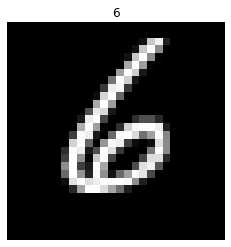

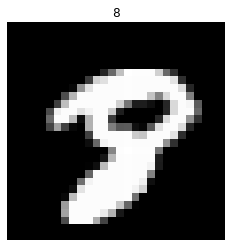

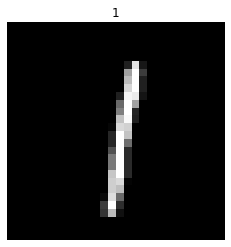

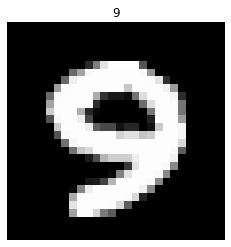

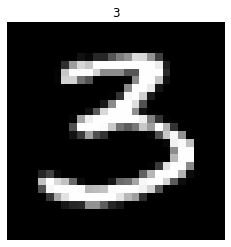

In [15]:
for i in range(5):
    plt.imshow(x.iloc[i].values.reshape(28,28),cmap="gray")
    plt.title(y.iloc[i])
    plt.axis('off')
    plt.show()

In [16]:
#split data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [17]:
# Fit KNN

knn = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)

In [19]:
#print confusion matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 91   0   0   0   0   0   0   0   0   0]
 [  0 115   0   0   0   0   0   0   0   0]
 [  2   1  97   1   0   0   0   3   0   0]
 [  0   1   0 107   0   1   0   1   2   0]
 [  0   1   0   0  90   0   1   2   0   7]
 [  0   0   0   4   0  85   2   0   1   0]
 [  2   0   0   0   0   0 106   0   0   0]
 [  2   4   0   0   1   0   0  95   0   6]
 [  0   4   2   8   1   1   2   0  75   3]
 [  1   1   0   1   3   0   0   3   0 114]]


In [20]:
#print accuracy score

ac=accuracy_score(y_test,y_pred)
print(ac)

0.9285714285714286


In [21]:
# print classification report

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        91
           1       0.91      1.00      0.95       115
           2       0.98      0.93      0.96       104
           3       0.88      0.96      0.92       112
           4       0.95      0.89      0.92       101
           5       0.98      0.92      0.95        92
           6       0.95      0.98      0.97       108
           7       0.91      0.88      0.90       108
           8       0.96      0.78      0.86        96
           9       0.88      0.93      0.90       123

    accuracy                           0.93      1050
   macro avg       0.93      0.93      0.93      1050
weighted avg       0.93      0.93      0.93      1050



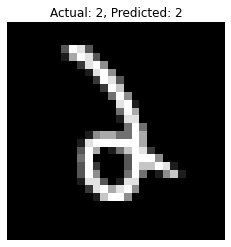

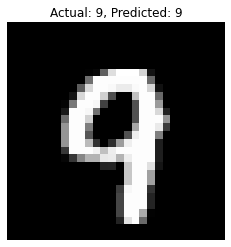

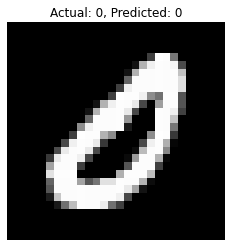

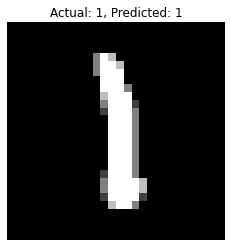

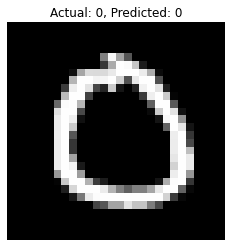

In [23]:
for i in range(5):
    plt.imshow(x_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()